<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/C%C3%B3pia_de_Pieper_Greiner3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

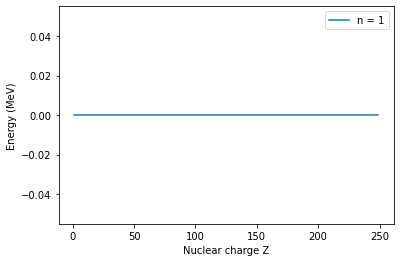

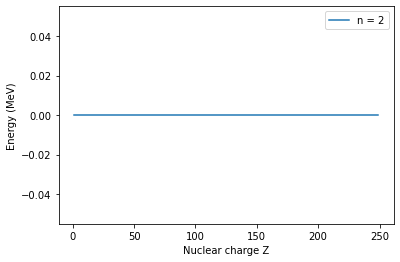

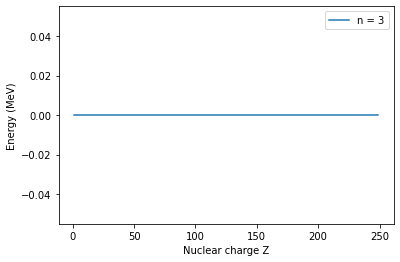

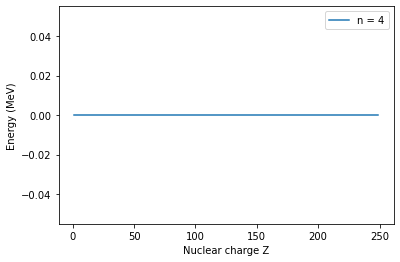

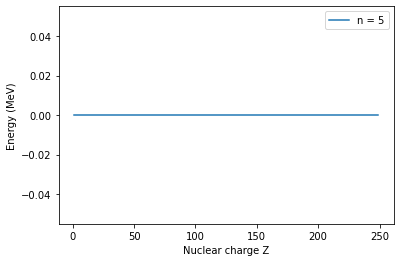

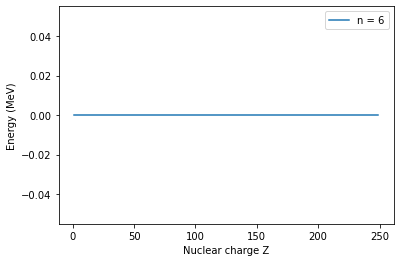

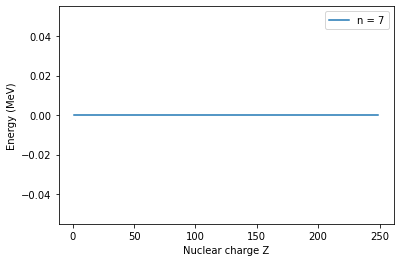

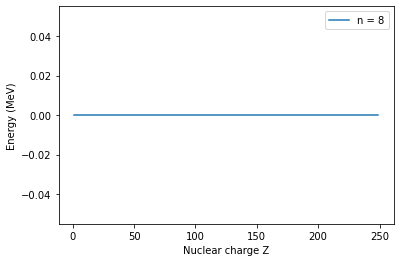

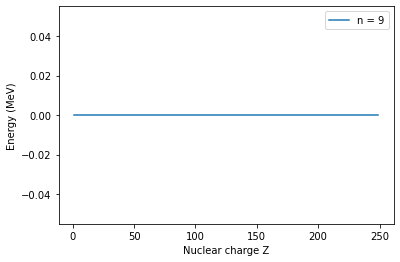

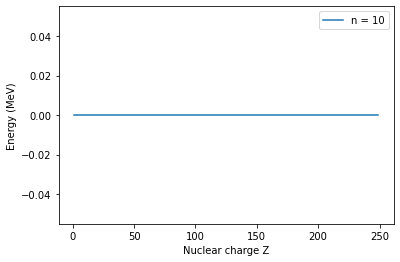

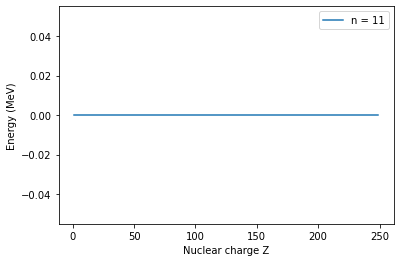

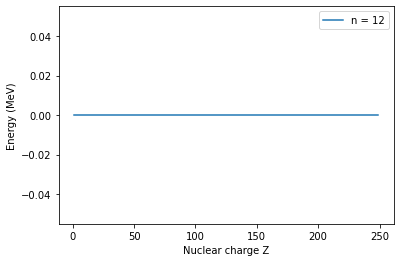

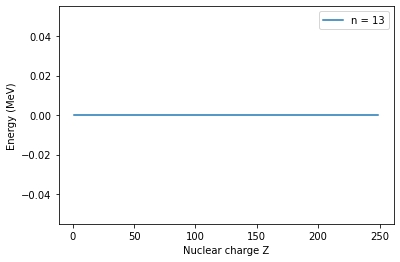

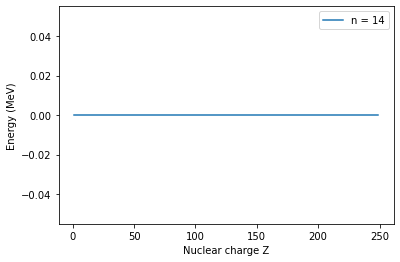

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp, solve_bvp
import matplotlib.pyplot as plt
from scipy.constants import physical_constants

a = physical_constants['Bohr radius'][0]
# Define r_eval as a global variable
r_eval = np.linspace(0, 1000, 100000)

# Constants
c = 299792458  # Speed of light [m/s]
hbar = 1.0545718e-34  # Reduced Planck constant [J*s]
me = 9.10938356e-31  # Electron mass [kg]
mp = 1.6726219e-27  # Proton mass [kg]
alpha = 1/137  # Fine-structure constant

# Define the range of nuclear charges and principal quantum numbers
Z_range = np.arange(1, 250)
n_range = np.arange(1, 5)

# Define the potential function
def V(r, Z):
#    return -alpha * Z / r
################
   A = Z
   V0 = 47.63 * Z**(5/3) - 132.94 * Z**(4/3) + 121.76 * Z - 47.59 / (1 + 0.0122 * Z**(2/3))
   R = 1.25 * A**(1/3) - 0.60
   a = 0.71 + 0.08 * Z**(1/3)
   return -V0 / (1 + np.exp((r - R) / a))
################

# Define the radial equation
def radial_eq(r, y, Z, E):
    psi, phi = y
    d_psi = phi
    d_phi = (V(r, Z) + np.sqrt((E - V(r, Z))**2 - (c**2 * (me**2 + (E - V(r, Z))**2 / (c**2 * hbar**2))) / (hbar**2 * r**2))) * psi / (c**2 * (me**2 + (E - V(r, Z))**2 / (c**2 * hbar**2)))
    return np.array([d_psi, d_phi])

# Define the boundary conditions
def boundary_conditions(ya, yb, E, Z):
    y1_interp = solve_radial_eq(E, Z)(r_eval)[-1]
    return [ya[0], yb[0] - np.sqrt(2 * me * c**2 * (y1_interp**2 + yb[1]**2) - (yb[1]**2 - y1_interp**2)**2) / (c * hbar)]

# Define a function to solve the radial equation for a given energy E
def solve_radial_eq(E, Z):
    r_eval = np.linspace(1e-10, 100, 10000)
    sol = solve_bvp(lambda r, y: radial_eq(r, y, Z, E), boundary_conditions, r_eval, [np.sin(np.pi * r_eval), np.pi * np.cos(np.pi * r_eval)])
    return sol.sol(r_eval)[0]


# Define a function to find the energy level of the bound state
def find_energy_level(Z, n):
    E_bound = 0
    E_min = me * c**2
    E_max = E_min + 1000 * hbar * c / a
    while E_max - E_min > 1e-9:
        E_bound = (E_min + E_max) / 2
        if solve_radial_eq(E_bound, Z)(a) * solve_radial_eq(E_bound, Z)(a - dr) < 0:
            E_max = E_bound
        else:
            E_min = E_bound
    return E_bound

dr = 1e-10

# Calculate the energy levels for each Z and n
energy_levels = np.zeros((len(Z_range), len(n_range)))
for i, Z in enumerate(Z_range):
    for j, n in enumerate(n_range):
        energy_levels[i, j] = find_energy_level(Z, n)

# Plot the energy levels as a function of nuclear charge
for j, n in enumerate(n_range):
   plt.plot(Z_range, energy_levels[:, j] / (mp * c**2), label=f"n = {n}")
   plt.xlabel("Nuclear charge Z")
   plt.ylabel("Energy (MeV)")
   plt.legend()
   plt.show()
